## LİNEER REGRESYON


### Gerekli Kütüphanelerin Yüklenmesi

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from warnings import filterwarnings
filterwarnings('ignore')

## Verisetinin Yüklenmesi
Verisetinde televizyon,radyo ve gazetede yapılan reklam harcamalarının satışlara nasıl etkilediği görülmektedir. Bağımlı değişken satışları ifade eden "sales"değişkenidir

In [6]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
# Görüldüğü üzere verisetindeki indeks değerleri değişken gibi algılandığı için verisetindeki Unnamed isimli sütunu kaldırdım
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [12]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


### Model

In [16]:
X = df[["radio"]] # Radyoda yapılan reklam harcamalarına göre satış değerini tahmin etmeye çalışacağız.

In [17]:
X.head()

,radio
0,37.8
1,39.3
2,45.9
3,41.3
4,10.8


In [18]:
y = df[["sales"]]

In [19]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


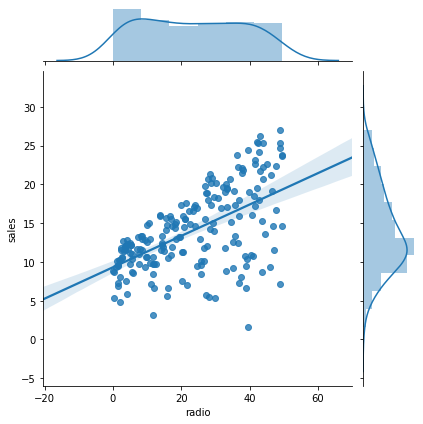

In [25]:
sns.jointplot(x="radio",y="sales",data=df,kind="reg")

In [20]:
linear_reg=LinearRegression()

In [22]:
linear_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

 .Model eğitimde y=mx+b(sales=m radio+b) denklemini kullanıyor.

In [27]:
print('m:', linear_reg.coef_)

m: [[0.20249578]]


In [28]:
print('b:', linear_reg.intercept_)

b: [9.3116381]


In [30]:
#R^2 Değeri:Bağımlı değişkendeki değişikliğin bağımsız değişkenlerce açıklanma yüzdesi
linear_reg.score(X,y)

0.33203245544529525

## Tahmin

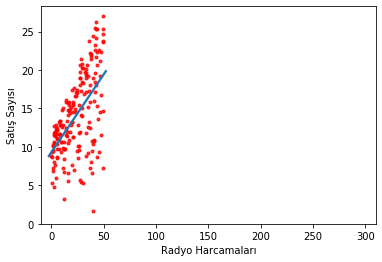

In [32]:

import matplotlib.pyplot as plt
g = sns.regplot(df["radio"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_ylabel("Satış Sayısı")
g.set_xlabel("Radyo Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [36]:
linear_reg.intercept_ + linear_reg.coef_*500

array([[110.55952979]])

In [37]:
linear_reg.predict([[500]])

array([[110.55952979]])

In [38]:
yeni_veri = [[25],[60],[110]]

In [39]:
linear_reg.predict(yeni_veri)

array([[14.37403268],
       [21.4613851 ],
       [31.58617427]])